In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris, make_blobs

Text(0.5, 0.98, 'Predicted clusters')

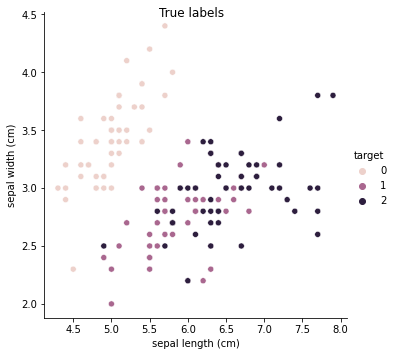

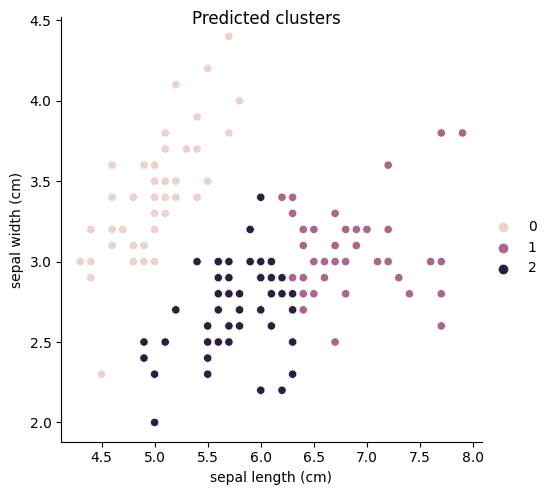

In [2]:
# Esercizio 20.1
iris = load_iris(as_frame=True)
data = iris.data
targets = iris.target
X = data.loc[:, ('sepal length (cm)', 'sepal width (cm)')].values
N_CLUSTERS = 3
kmeans = KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(X)
labels = sns.relplot(
    data=data,
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue=targets)
labels.fig.suptitle('True labels')

y_pred = kmeans.predict(X)
predictions = sns.relplot(
    data=data,
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue=y_pred)
predictions.fig.suptitle('Predicted clusters')

Text(0.5, 1.0, 'Cardinalities')

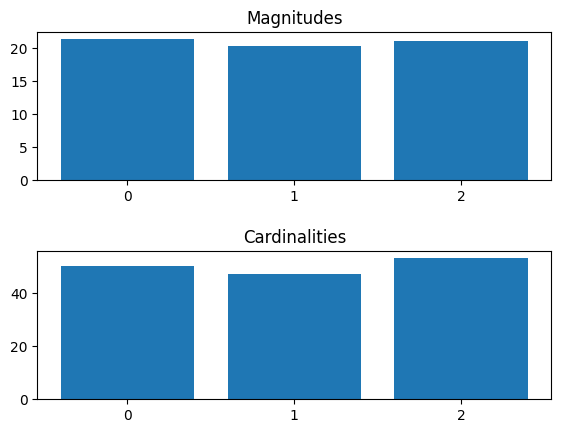

In [3]:
# Esercizio 20.2
# Ottengo le distanze
X_dist = kmeans.transform(X)

# Funzione per calcolare magnitudine e cardinalità
def get_magnitudes_cardinalities(dists):
    clusters = np.argmin(dists, axis=1)
    distances = np.amin(dists, axis=1)
    dists_cens = list(zip(clusters, distances))
    magnitudes = np.zeros(len(set(clusters)))
    cardinalities = np.zeros(len(set(clusters)))
    for dc in dists_cens:
        magnitudes[dc[0]] += dc[1]
        cardinalities[dc[0]] += 1
    return magnitudes, cardinalities

# Plotto magnitudine e cardinalità
m, c = get_magnitudes_cardinalities(X_dist)
cls_tags = list(range(N_CLUSTERS))
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.tight_layout(pad=3.0)
ax1.bar(cls_tags, m)
ax1.set_xticks([0, 1, 2])
ax1.set_title('Magnitudes')
ax2.bar(cls_tags, c)
ax2.set_xticks([0, 1, 2])
ax2.set_title('Cardinalities')

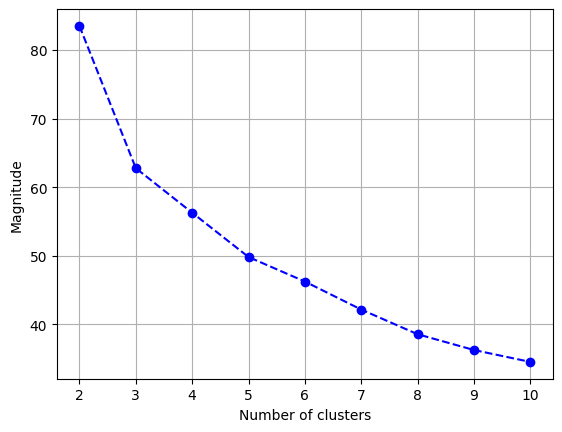

In [4]:
# Esercizio E20.3
def fit_get_magnitude(values, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(values)
    m, _ = get_magnitudes_cardinalities(kmeans.transform(values))
    return m.sum()

def get_k_magnitudes(values, min_clusters, max_clusters):
    clusters_values = list(range(min_clusters, max_clusters+1))
    magnitudes = [
        fit_get_magnitude(values, n_clusters) \
        for n_clusters in clusters_values]
    return magnitudes, clusters_values

ms, cvals = get_k_magnitudes(X, 2, 10)

plt.plot(cvals, ms, '--bo')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Magnitude')
plt.show()


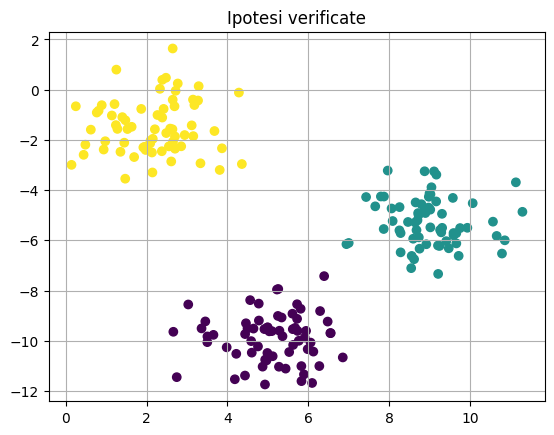

In [5]:
# Esercizio E20.4
X, y = make_blobs(n_samples=200, random_state=200)
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('Ipotesi verificate')
plt.grid()

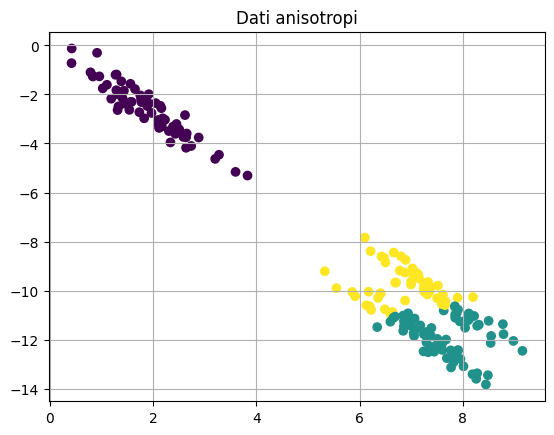

In [6]:
# Ipotesi 1: anisotropia
X_an = np.dot(X, [[0.6, -0.64], [-0.41, 0.85]])
kmeans_an = KMeans(n_clusters=3)
y_an = kmeans_an.fit_predict(X_an)
plt.scatter(X_an[:, 0], X_an[:, 1], c=y_an)
plt.title('Dati anisotropi')
plt.grid()

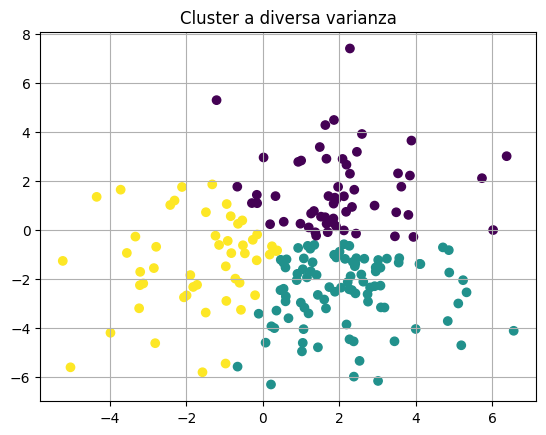

In [7]:
# Ipotesi 2: diversa varianza
X_var, y_var = make_blobs(
    n_samples=200,
    random_state=200,
    center_box=(-2, 2),
    cluster_std=[1.8, 2.5, 2.4])

kmeans_var = KMeans(n_clusters=3)
y_pred_var = kmeans_var.fit_predict(X_var)
plt.scatter(X_var[:, 0], X_var[:, 1], c=y_pred_var)
plt.title('Cluster a diversa varianza')
plt.grid()

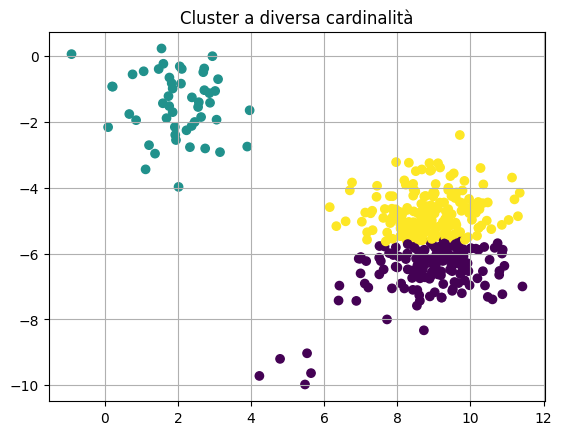

In [8]:
# Ipotesi 3: diversa cardinalità
X, y = make_blobs(n_samples=1000, random_state=200)

X_uneven = np.concatenate(
    (X[y == 0][:500], X[y == 1][:50], X[y == 2][:5]),
    axis=0)
kmeans_uneven = KMeans(n_clusters=3)
y_uneven = kmeans_uneven.fit_predict(X_uneven)
plt.scatter(X_uneven[:, 0], X_uneven[:, 1], c=y_uneven)
plt.title('Cluster a diversa cardinalità')
plt.grid()